In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
data = pd.read_csv("/content/drive/MyDrive/YT.csv",encoding='latin1')

In [240]:
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [241]:
null_perc_col=data.isna().sum().sort_values()/len(data)*100
null_perc_col

rank                                        0.000000
lowest_monthly_earnings                     0.000000
highest_yearly_earnings                     0.000000
highest_monthly_earnings                    0.000000
uploads                                     0.000000
lowest_yearly_earnings                      0.000000
video views                                 0.000000
subscribers                                 0.000000
Youtuber                                    0.000000
Title                                       0.000000
video_views_rank                            0.100503
created_date                                0.502513
created_year                                0.502513
created_month                               0.502513
channel_type                                3.015075
channel_type_rank                           3.316583
category                                    4.623116
video_views_for_the_last_30_days            5.628141
country_rank                               11.

In [242]:
data.isna().sum().sort_values()

rank                                         0
lowest_monthly_earnings                      0
highest_yearly_earnings                      0
highest_monthly_earnings                     0
uploads                                      0
lowest_yearly_earnings                       0
video views                                  0
subscribers                                  0
Youtuber                                     0
Title                                        0
video_views_rank                             1
created_date                                 5
created_year                                 5
created_month                                5
channel_type                                30
channel_type_rank                           33
category                                    46
video_views_for_the_last_30_days            56
country_rank                               116
Abbreviation                               122
Country                                    122
Gross tertiar

In [243]:
data=data.dropna(subset=['video_views_rank'])     #Only 1 Row has NULL, hence removing that row

In [244]:
data=data.dropna(subset=['created_year'])
data=data.dropna(subset=['created_date'])
data=data.dropna(subset=['created_month'])

In [245]:
def RemoveNaN(df,nan_data):
    cols = list(df.columns[df.isnull().sum() != 0])

    for col in cols:
        t=0

        if(type(nan_data[col]) is list):
            t=nan_data[col][1]
        else:
            t = nan_data[col]
        replace_type = t

        if(replace_type == "median"):
              df[col].fillna(df[col].median(),inplace=True)
        # elif(replace_type == "mean"):
        #     df[col].fillna(df[col].mean(),inplace=True)
        # elif(replace_type == "mode"):
        else:
            df[col].fillna(replace_type,inplace=True)
        print()

In [246]:
data_nan = {
'channel_type':'Not Specified',
'channel_type_rank':-1,
'category':'Not Specified',
'video_views_for_the_last_30_days':0,
'country_rank': -1,
'Abbreviation':'Not Specified',
'Country':'Not Specified',
'Longitude':-1,
'Gross tertiary education enrollment (%)':0,
'Population':0,
'Unemployment rate':0,
'Urban_population':0,
'Latitude':-1,
'subscribers_for_last_30_days':0,
}

In [247]:
RemoveNaN(data,data_nan) #Removing NULL values in train

In [248]:
data.isna().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     990 non-null    int64  
 1   Youtuber                                 990 non-null    object 
 2   subscribers                              990 non-null    int64  
 3   video views                              990 non-null    float64
 4   category                                 990 non-null    object 
 5   Title                                    990 non-null    object 
 6   uploads                                  990 non-null    int64  
 7   Country                                  990 non-null    object 
 8   Abbreviation                             990 non-null    object 
 9   channel_type                             990 non-null    object 
 10  video_views_rank                         990 non-n

In [250]:
data = data.astype({
    'video views': 'int64',
    'video_views_rank': 'int64',
    'country_rank': 'int64',
    'channel_type_rank': 'int64',
    'video_views_for_the_last_30_days': 'int64',
    'subscribers_for_last_30_days': 'int64',
    'created_year': 'int64',
    'Population': 'int64',
    'Urban_population': 'int64'
})

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     990 non-null    int64  
 1   Youtuber                                 990 non-null    object 
 2   subscribers                              990 non-null    int64  
 3   video views                              990 non-null    int64  
 4   category                                 990 non-null    object 
 5   Title                                    990 non-null    object 
 6   uploads                                  990 non-null    int64  
 7   Country                                  990 non-null    object 
 8   Abbreviation                             990 non-null    object 
 9   channel_type                             990 non-null    object 
 10  video_views_rank                         990 non-n

Remove & Replace Unwanted Characters

In [251]:
# Define remove & replace logic as replacing any non-alphanumeric characters
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

# Replace characters 'Youtuber' & 'Title' with an empty string
data['Youtuber'] = data['Youtuber'].str.replace(pattern, '')
data['Title'] = data['Title'].str.replace(pattern, '')

<ipython-input-251-2d44ee4937fc>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Youtuber'] = data['Youtuber'].str.replace(pattern, '')
<ipython-input-251-2d44ee4937fc>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Title'] = data['Title'].str.replace(pattern, '')


In [252]:
# Remove any trailing/ leading whitespace from values
data['Youtuber'] = data['Youtuber'].str.strip()
data['Title'] = data['Title'].str.strip()

In [253]:
filter_youtuber_rows = data['Youtuber'].str.contains(pattern, regex = True)
filter_title_rows = data['Title'].str.contains(pattern, regex = True)

In [254]:
filter_youtuber_rows_results = filter_youtuber_rows[filter_youtuber_rows == True]
print(filter_youtuber_rows_results)

Series([], Name: Youtuber, dtype: bool)


In [255]:
# Validate results of string remove & replace
filter_title_rows_results = filter_title_rows[filter_title_rows == True]
print(filter_title_rows_results)

Series([], Name: Title, dtype: bool)


In [256]:
filtered_df = data[data['video views'] == 0]
filtered_df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,0,2006,Mar,5.0,88.2,328239523,14.7,270663028,37.09024,-95.712891
5,6,Music,119000000,0,Not Specified,Music,0,Not Specified,Not Specified,Music,...,0,2013,Sep,24.0,0.0,0,0.0,0,-1.00000,-1.000000
12,13,Gaming,93600000,0,Not Specified,Gaming,0,Not Specified,Not Specified,Games,...,0,2013,Dec,15.0,0.0,0,0.0,0,-1.00000,-1.000000
18,19,Sports,75000000,0,Not Specified,sports,3,United States,US,Entertainment,...,0,2006,Jan,30.0,88.2,328239523,14.7,270663028,37.09024,-95.712891
102,103,News,36300000,0,Not Specified,News,0,Not Specified,Not Specified,Not Specified,...,0,2013,Sep,9.0,0.0,0,0.0,0,-1.00000,-1.000000
173,174,Popular on YouTube,29300000,0,Not Specified,Popular on Youtube,3,Not Specified,Not Specified,Education,...,0,2017,Aug,7.0,0.0,0,0.0,0,-1.00000,-1.000000
360,361,Minecraft - Topic,20900000,0,Not Specified,Minecraft - Topic,0,Not Specified,Not Specified,Games,...,300000,2013,Dec,20.0,0.0,0,0.0,0,-1.00000,-1.000000
592,593,Live,16100000,0,Not Specified,Live,0,Not Specified,Not Specified,Not Specified,...,0,2015,Jan,13.0,0.0,0,0.0,0,-1.00000,-1.000000


In [257]:
# Remove rows from with 0 video views
for x in data.index:
    if data.loc[x, 'video views'] == 0:
        data.drop(x, inplace = True)

# Validate the results
filtered_df = data[data['video views'] == 0]
filtered_df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [258]:
# Filter for YouTube channels with a blank 'Youtuber' name
filtered_df = data[data['Youtuber'] == '']
filtered_df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
64,65,,43200000,36458726976,Film & Animation,,1478,Russia,RU,Education,...,300000,2011,May,31.0,81.9,144373535,4.59,107683889,61.524010,105.318756
161,162,,30400000,17999961915,Not Specified,,532,United States,US,Entertainment,...,300000,2018,Nov,3.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
433,434,,19000000,4924054368,Education,,60,United States,US,Entertainment,...,100000,2018,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
447,448,,18800000,9594188708,Entertainment,,530,Ukraine,UA,Entertainment,...,100000,2014,Oct,20.0,82.7,44385155,8.88,30835699,48.379433,31.165580
561,562,,16500000,2440934034,Entertainment,,421,United States,US,Entertainment,...,200000,2014,Mar,9.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
606,607,,15900000,1845329502,People & Blogs,Kung Fu Padla,0,Russia,RU,Games,...,10,2017,May,27.0,81.9,144373535,4.59,107683889,61.524010,105.318756
632,633,,15500000,8265129639,Shows,,1021,Saudi Arabia,SA,Film,...,300000,2017,May,16.0,68.0,34268528,5.93,28807838,23.885942,45.079162
700,701,,14900000,439098,People & Blogs,,1,Russia,RU,News,...,0,2008,Aug,11.0,81.9,144373535,4.59,107683889,61.524010,105.318756
707,708,,14800000,7018015062,Howto & Style,,2387,Ukraine,UA,Howto,...,0,2015,Oct,12.0,82.7,44385155,8.88,30835699,48.379433,31.165580
714,715,,14700000,2230986039,Entertainment,,1385,Saudi Arabia,SA,Entertainment,...,0,2016,May,27.0,68.0,34268528,5.93,28807838,23.885942,45.079162


In [259]:
for x in data.index:
    if data.loc[x, 'Youtuber'] == '':
        data.drop(x, inplace = True)

# Validate the results
filtered_df = data[data['Youtuber'] == '']
filtered_df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [260]:
# Sort values by number of 'Subscribers' descending from highest to lowest
data.sort_values(by = 'subscribers', ascending = False)
data

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,2000000,2006,Mar,13.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000,2012,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000,2006,Sep,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,1000000,2006,Sep,20.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
6,7,Kids Diana Show,112000000,93247040539,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,...,0,2015,May,12.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por A,12300000,9029609749,Sports,Natan por A,1200,Brazil,BR,Entertainment,...,700000,2017,Feb,12.0,51.3,212559417,12.08,183241641,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000,2018,Sep,14.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
992,993,Panda,12300000,2214684303,Not Specified,HybridPanda,2452,United Kingdom,GB,Games,...,1000,2006,Sep,11.0,60.0,66834405,3.85,55908316,55.378051,-3.435973
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000,2012,May,9.0,67.0,10285453,6.48,9021165,60.128161,18.643501


In [261]:
data = data.reset_index(drop = True)
data

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,2000000,2006,Mar,13.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
1,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000,2012,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
2,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000,2006,Sep,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,1000000,2006,Sep,20.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
4,7,Kids Diana Show,112000000,93247040539,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,...,0,2015,May,12.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,991,Natan por A,12300000,9029609749,Sports,Natan por A,1200,Brazil,BR,Entertainment,...,700000,2017,Feb,12.0,51.3,212559417,12.08,183241641,-14.235004,-51.925280
962,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000,2018,Sep,14.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
963,993,Panda,12300000,2214684303,Not Specified,HybridPanda,2452,United Kingdom,GB,Games,...,1000,2006,Sep,11.0,60.0,66834405,3.85,55908316,55.378051,-3.435973
964,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000,2012,May,9.0,67.0,10285453,6.48,9021165,60.128161,18.643501


In [262]:
numerical_summary = data.describe().round().astype(int)
print(numerical_summary)

       rank  subscribers   video views  uploads  video_views_rank  \
count   966          966           966      966               966   
mean    499     22702899   11205591151     9450            509403   
std     287     16568026   14229615613    34626           1314638   
min       1     12300000          2634        0                 1   
25%     251     14500000    4362655888      214               308   
50%     496     17700000    7867056346      746               902   
75%     747     24475000   13774791150     2789              3255   
max     995    245000000  228000000000   301308           4057944   

       country_rank  channel_type_rank  video_views_for_the_last_30_days  \
count           966                966                               966   
mean            315                710                         169510735   
std            1093               1901                         411795373   
min              -1                 -1                                 0  

In [265]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Youtuber', 'category', 'Title', 'Country', 'Abbreviation',
       'channel_type', 'created_month'],
      dtype='object')


In [264]:
object_summary = data[categorical_columns].describe(include = ['object'])
print(object_summary)

       Youtuber       category   Title        Country Abbreviation  \
count       966            966     966            966          966   
unique      964             19     961             50           50   
top        BIBO  Entertainment  Beyonc  United States           US   
freq          2            235       2            306          306   

         channel_type created_month  
count             966           966  
unique             15            12  
top     Entertainment           Jan  
freq              295            99  


In [266]:
# Output the DataFrame to a CSV file
data.to_csv('/content/drive/MyDrive/YT2.csv',index = False, encoding = 'latin-1')

<ipython-input-267-eeb40fec8415>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


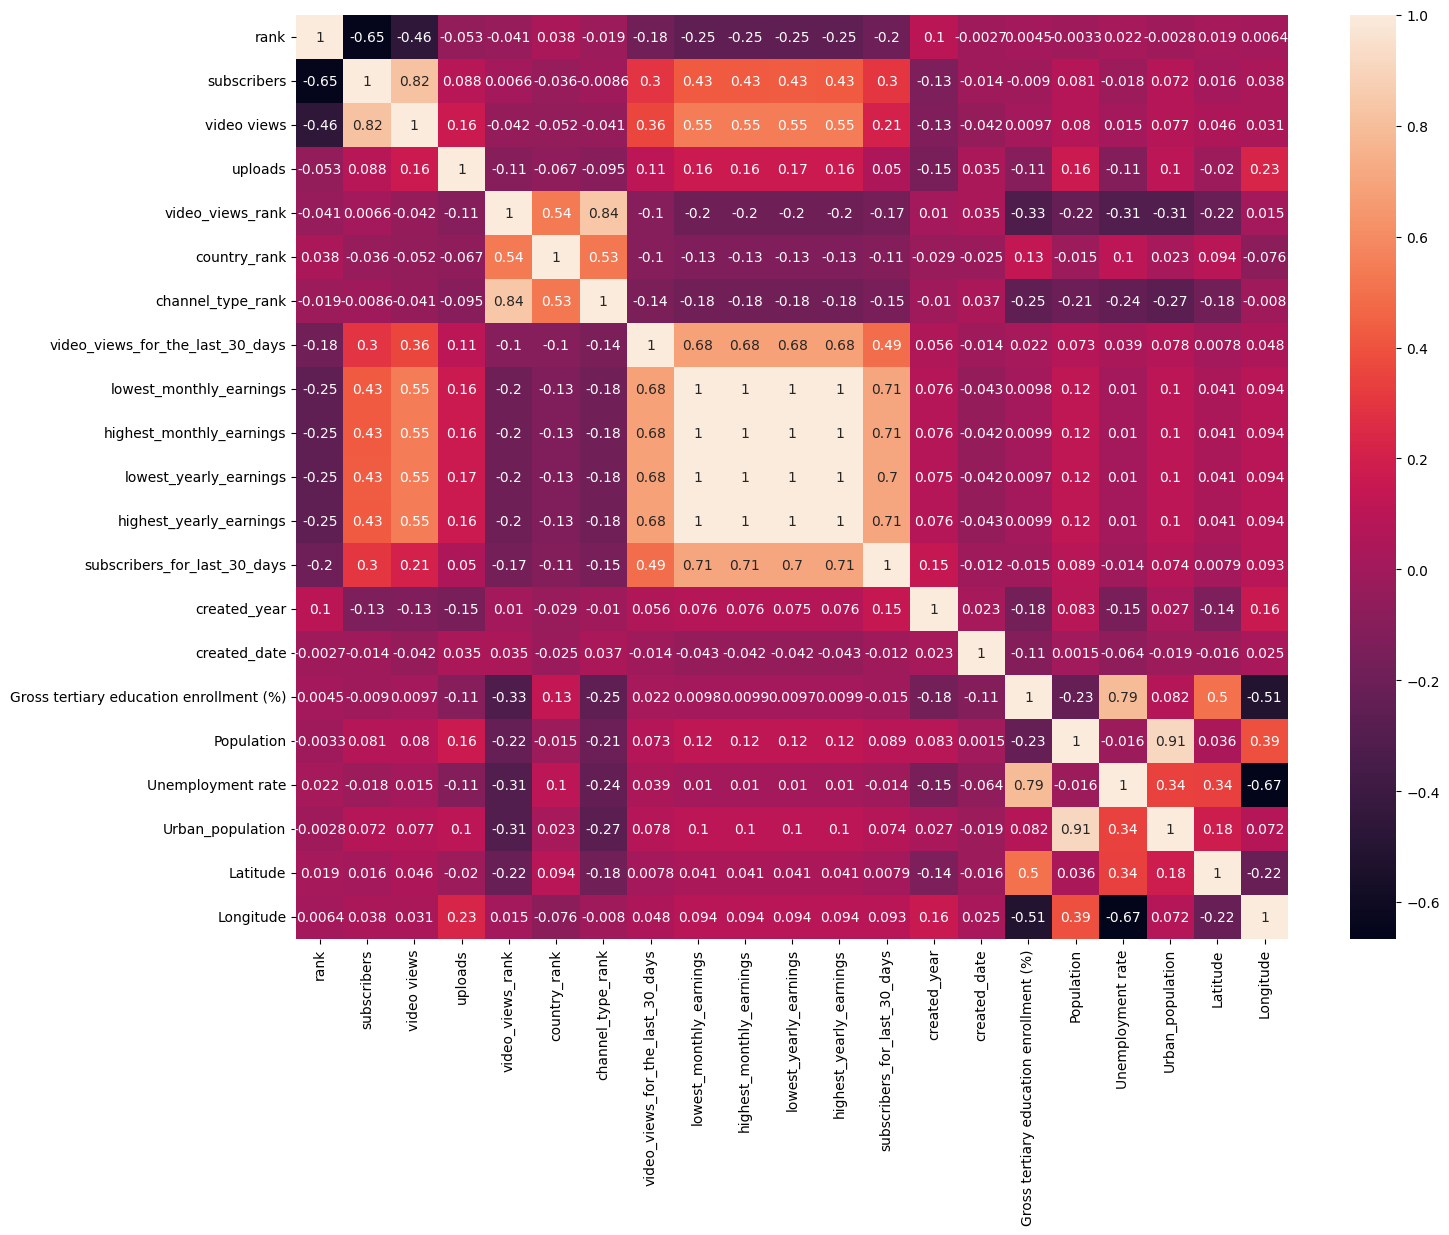

In [267]:
# Adjust the default figure size for matplotlib plots
plt.rcParams['figure.figsize'] = (16, 12)

# Generate correlation matrix heatmap
sns.heatmap(data.corr(), annot = True)

# Display the correlation matrix heatmap
plt.show()

Correlation Plots

In [268]:
#Subscribers and the Number of Video Views
df_new = data

# Create new columns to support visualisation
df_new['Subscribers (mn.)'] = (df_new['subscribers'] / 1000000).astype(int)
df_new['Video Views (bn.)'] = (df_new['video views'] / 1000000000).astype(int)
df_new['Uploads (k.)'] = (df_new['uploads'] / 1000)

# Create new subset for scatter plot
df_sub_pop = df_new[['Subscribers (mn.)', 'Video Views (bn.)']]
df_sub_pop

,Subscribers (mn.),Video Views (bn.)
0,245,228
1,166,28
2,162,164
3,159,148
4,112,93
...,...,...
961,12,9
962,12,1
963,12,2
964,12,0


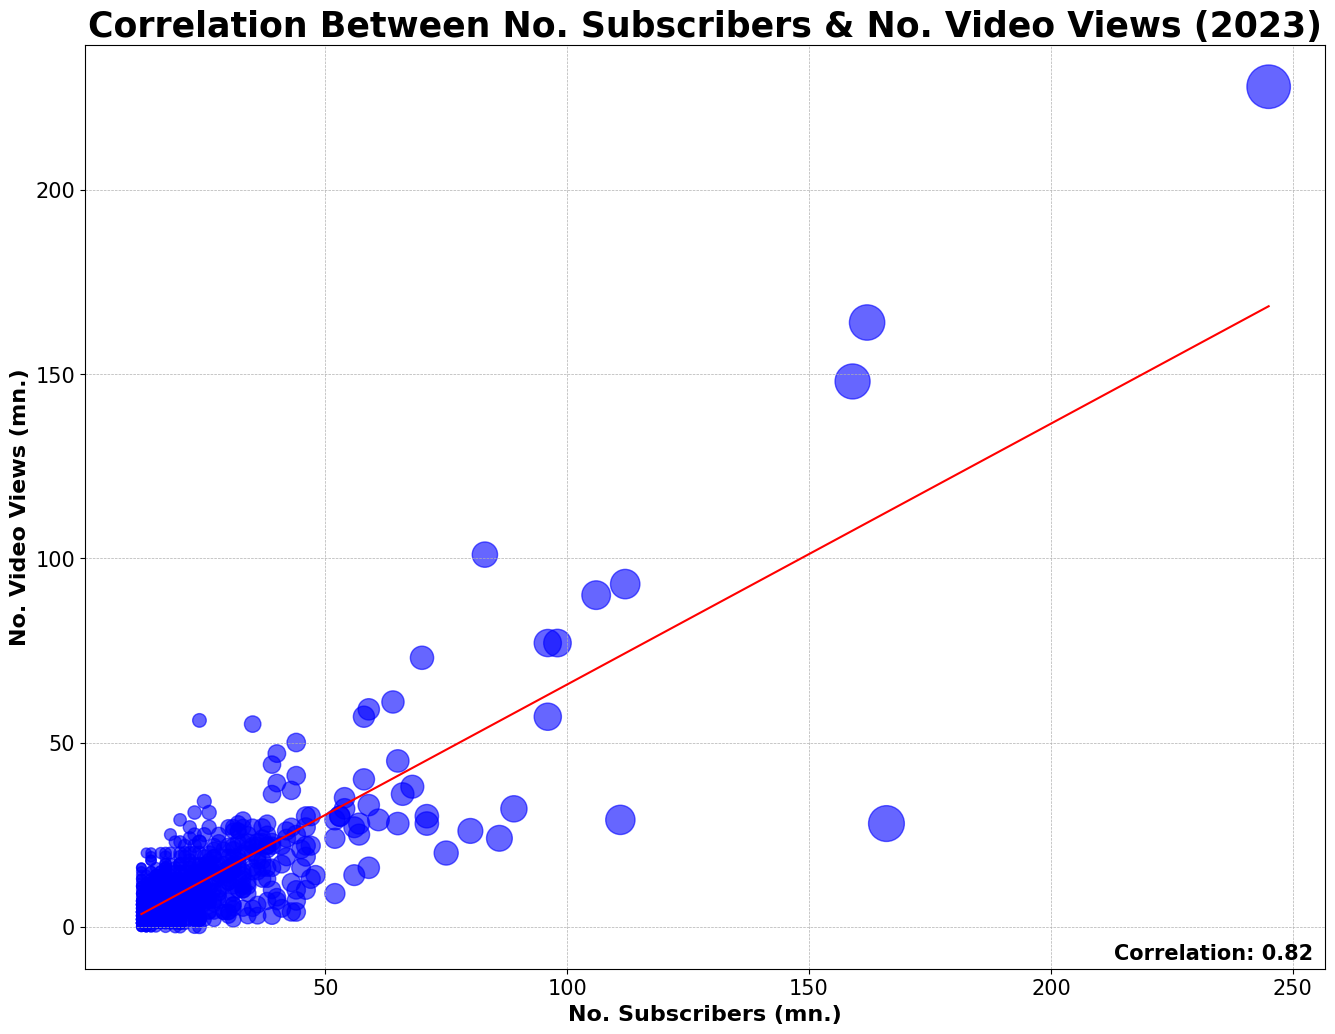

In [269]:
# Calculate the correlation coefficient
correlation = df_sub_pop['Subscribers (mn.)'].corr(df_sub_pop['Video Views (bn.)'])

# Create linear regression for trend line
m, b = np.polyfit(df_sub_pop['Subscribers (mn.)'], df_sub_pop['Video Views (bn.)'], 1)

# Set scaling factor of circle size
scaling_factor = 4

# Calculate the size of circles
sizes = df_sub_pop['Subscribers (mn.)'] * scaling_factor

# Set figuresize
plt.figure(figsize=(16, 12))

# Plot df as a scatter
plt.scatter(df_sub_pop['Subscribers (mn.)'], df_sub_pop['Video Views (bn.)'], s = sizes, color='#0000FF', alpha=0.6)

# Plot trendline
plt.plot(df_sub_pop['Subscribers (mn.)'], m * df_sub_pop['Subscribers (mn.)'] + b, color='#FF0000')

# Adjust chart formatting
plt.title('Correlation Between No. Subscribers & No. Video Views (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. Subscribers (mn.)', fontsize = 16,  weight = 'bold')
plt.ylabel('No. Video Views (mn.)', fontsize = 16,  weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.annotate(f'Correlation: {correlation:.2f}',
             xy = (0.83, 0.01),
             xycoords = 'axes fraction',
             fontsize = 15,
             weight = 'bold')

plt.show()

In [270]:
#Number of Subscribers and the Number of Video Uploads

df_new = data

# Create new df for scatter plot
df_sub_pop_2 = df_new[['Subscribers (mn.)', 'Uploads (k.)']]
df_sub_pop_2

,Subscribers (mn.),Uploads (k.)
0,245,20.082
1,166,0.741
2,162,0.966
3,159,116.536
4,112,1.111
...,...,...
961,12,1.200
962,12,1.500
963,12,2.452
964,12,0.039


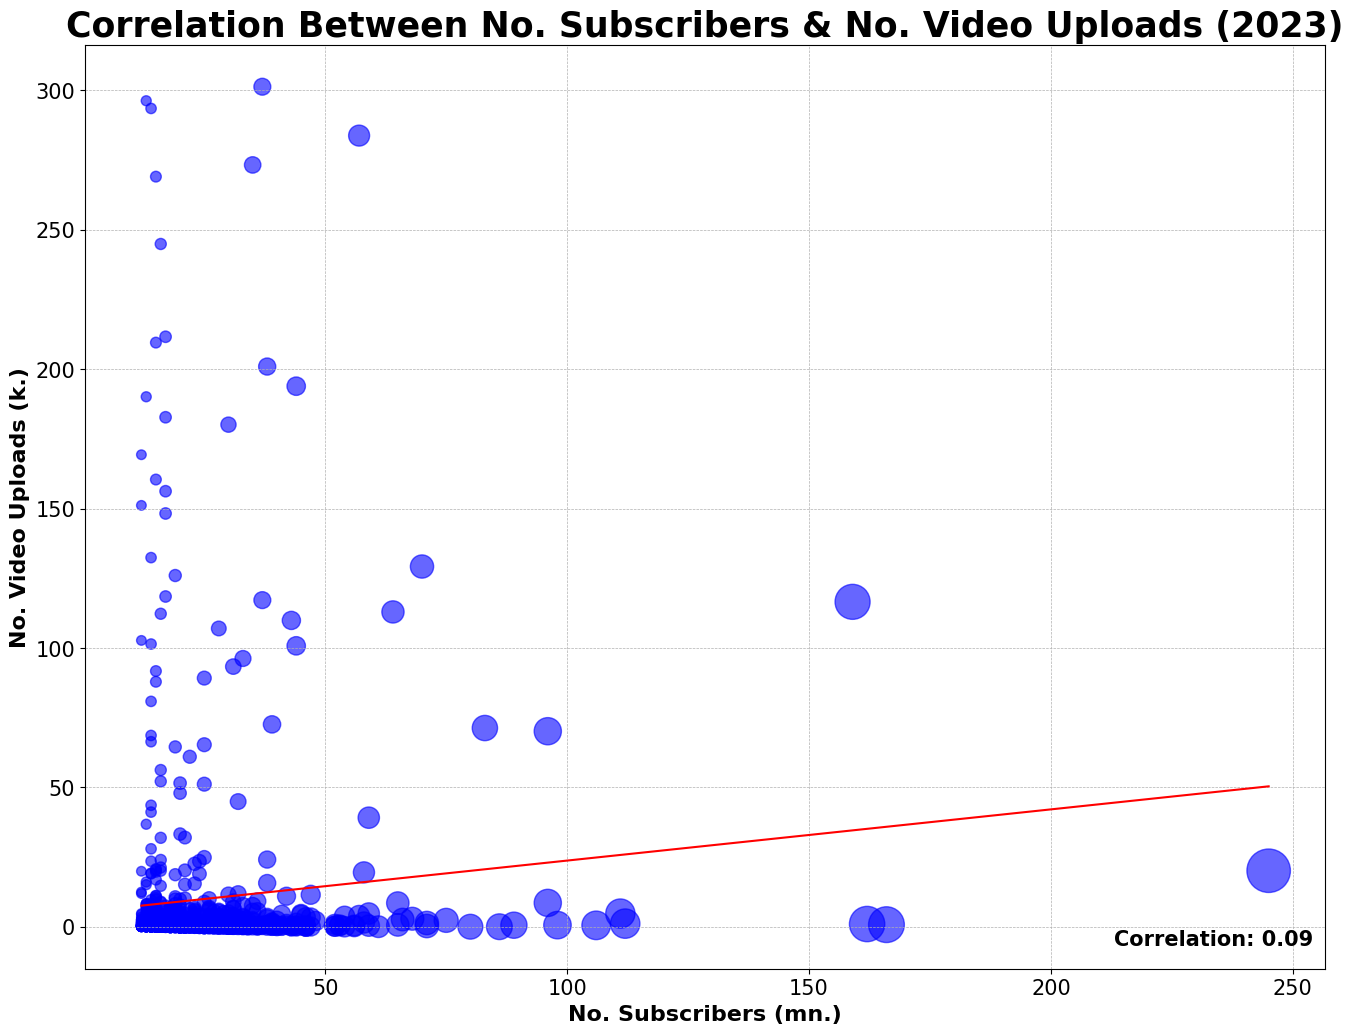

In [271]:
# Calculate the correlation coefficient
correlation = df_sub_pop_2['Subscribers (mn.)'].corr(df_sub_pop_2['Uploads (k.)'])

# Create linear regression for trend line
m, b = np.polyfit(df_sub_pop_2['Subscribers (mn.)'], df_sub_pop_2['Uploads (k.)'], 1)

# Set scaling factor of circle size
scaling_factor = 4

# Calculate the size of circles
sizes = df_sub_pop_2['Subscribers (mn.)'] * scaling_factor

# Set figuresize
plt.figure(figsize = (16, 12))

# Plot df as a scatter
plt.scatter(df_sub_pop_2['Subscribers (mn.)'], df_sub_pop_2['Uploads (k.)'], s = sizes, color = '#0000FF', alpha = 0.6)

# Plot trendline
plt.plot(df_sub_pop_2['Subscribers (mn.)'], m * df_sub_pop_2['Subscribers (mn.)'] + b, color = '#FF0000')

# Adjust chart formatting
plt.title('Correlation Between No. Subscribers & No. Video Uploads (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. Subscribers (mn.)', fontsize = 16, weight = 'bold')
plt.ylabel('No. Video Uploads (k.)', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.annotate(f'Correlation: {correlation:.2f}',
             xy = (0.83, 0.025),
             xycoords = 'axes fraction',
             fontsize = 15,
             weight = 'bold')

plt.show()

In [272]:
#Number of Subscribers and the Number of Video Uploads

df_new = data

# Create new df for scatter plot
df_sub_pop_2 = df_new[['Uploads (k.)', 'Video Views (bn.)']]
df_sub_pop_2

,Uploads (k.),Video Views (bn.)
0,20.082,228
1,0.741,28
2,0.966,164
3,116.536,148
4,1.111,93
...,...,...
961,1.200,9
962,1.500,1
963,2.452,2
964,0.039,0


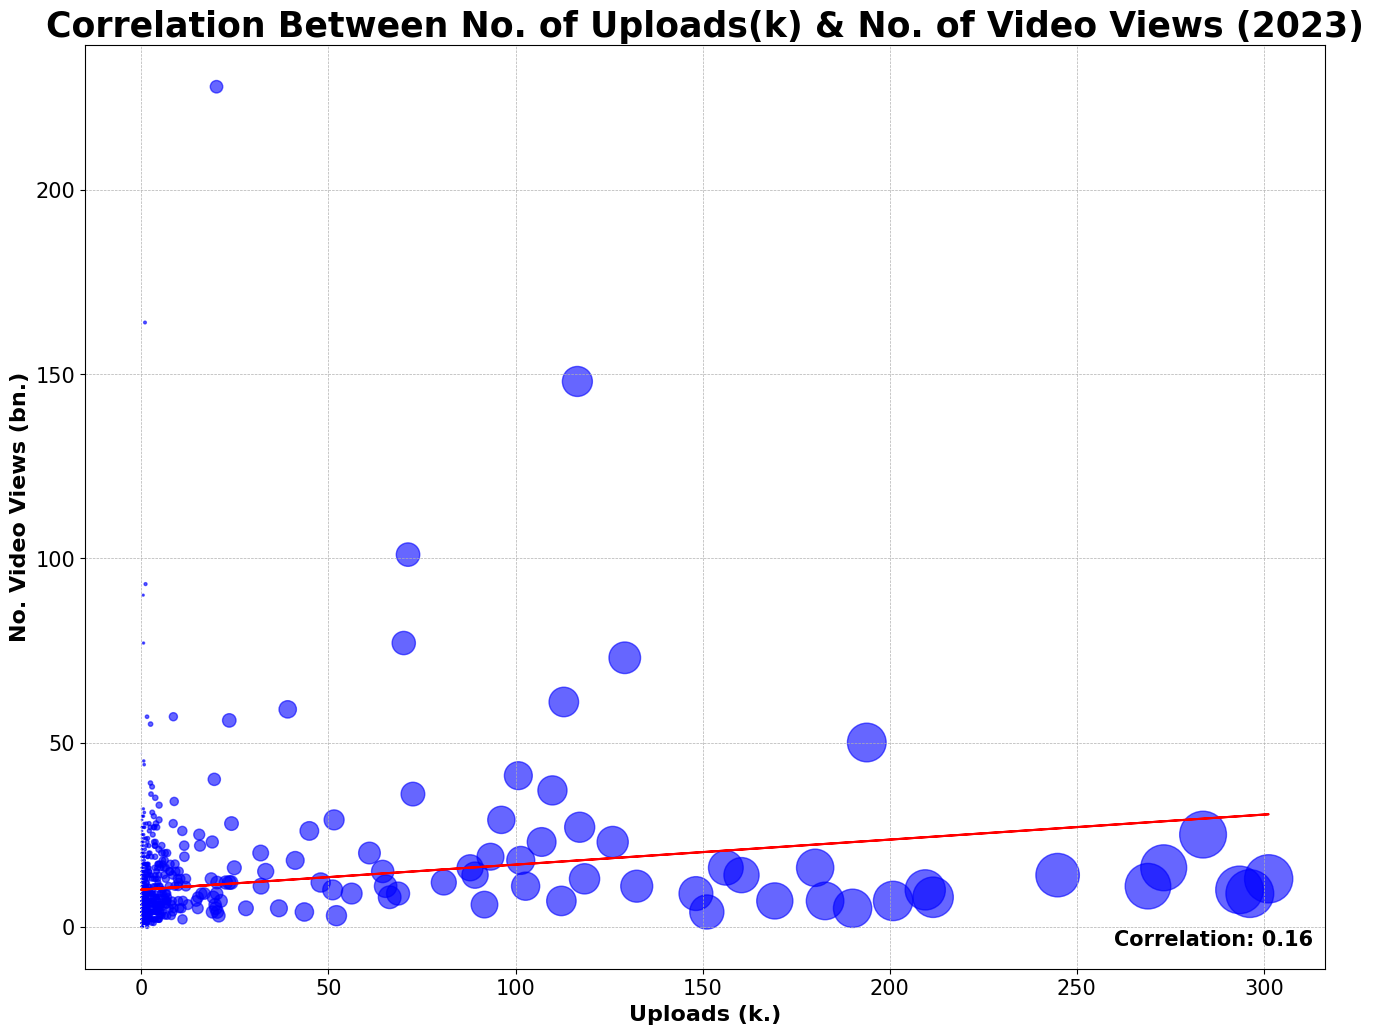

In [273]:
# Calculate the correlation coefficient
correlation = df_sub_pop_2['Uploads (k.)'].corr(df_sub_pop_2['Video Views (bn.)'])

# Create linear regression for trend line
m, b = np.polyfit(df_sub_pop_2['Uploads (k.)'], df_sub_pop_2['Video Views (bn.)'], 1)

# Set scaling factor of circle size
scaling_factor = 4

# Calculate the size of circles
sizes = df_sub_pop_2['Uploads (k.)'] * scaling_factor

# Set figuresize
plt.figure(figsize = (16, 12))

# Plot df as a scatter
plt.scatter(df_sub_pop_2['Uploads (k.)'], df_sub_pop_2['Video Views (bn.)'], s = sizes, color = '#0000FF', alpha = 0.6)

# Plot trendline
plt.plot(df_sub_pop_2['Uploads (k.)'], m * df_sub_pop_2['Uploads (k.)'] + b, color = '#FF0000')

# Adjust chart formatting
plt.title('Correlation Between No. of Uploads(k) & No. of Video Views (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('Uploads (k.)', fontsize = 16, weight = 'bold')
plt.ylabel('No. Video Views (bn.)', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.annotate(f'Correlation: {correlation:.2f}',
             xy = (0.83, 0.025),
             xycoords = 'axes fraction',
             fontsize = 15,
             weight = 'bold')

plt.show()

In [274]:
# Calculate avg. monthly averages per category rounded to 0 decimal places
data['Avg. Monthly Earnings'] = (data['lowest_monthly_earnings'] + data['highest_monthly_earnings']) / 2

# Create new df to group by category & calculate mean avg. monthly earnings by category
category_avg_earnings = data.groupby('category').agg({
    'Avg. Monthly Earnings': 'mean',
    }).reset_index()

In [275]:
#Correlation Between the Number of Views and Estimated Revenue?

df_sub_pop_4 =data[['video views', 'Avg. Monthly Earnings']].copy()

df_sub_pop_4['Video Views (bn.)'] = df_sub_pop_4['video views'] / 1000000000
df_sub_pop_4['Avg. Monthly Earnings ($000s)'] = df_sub_pop_4['Avg. Monthly Earnings'] / 1000

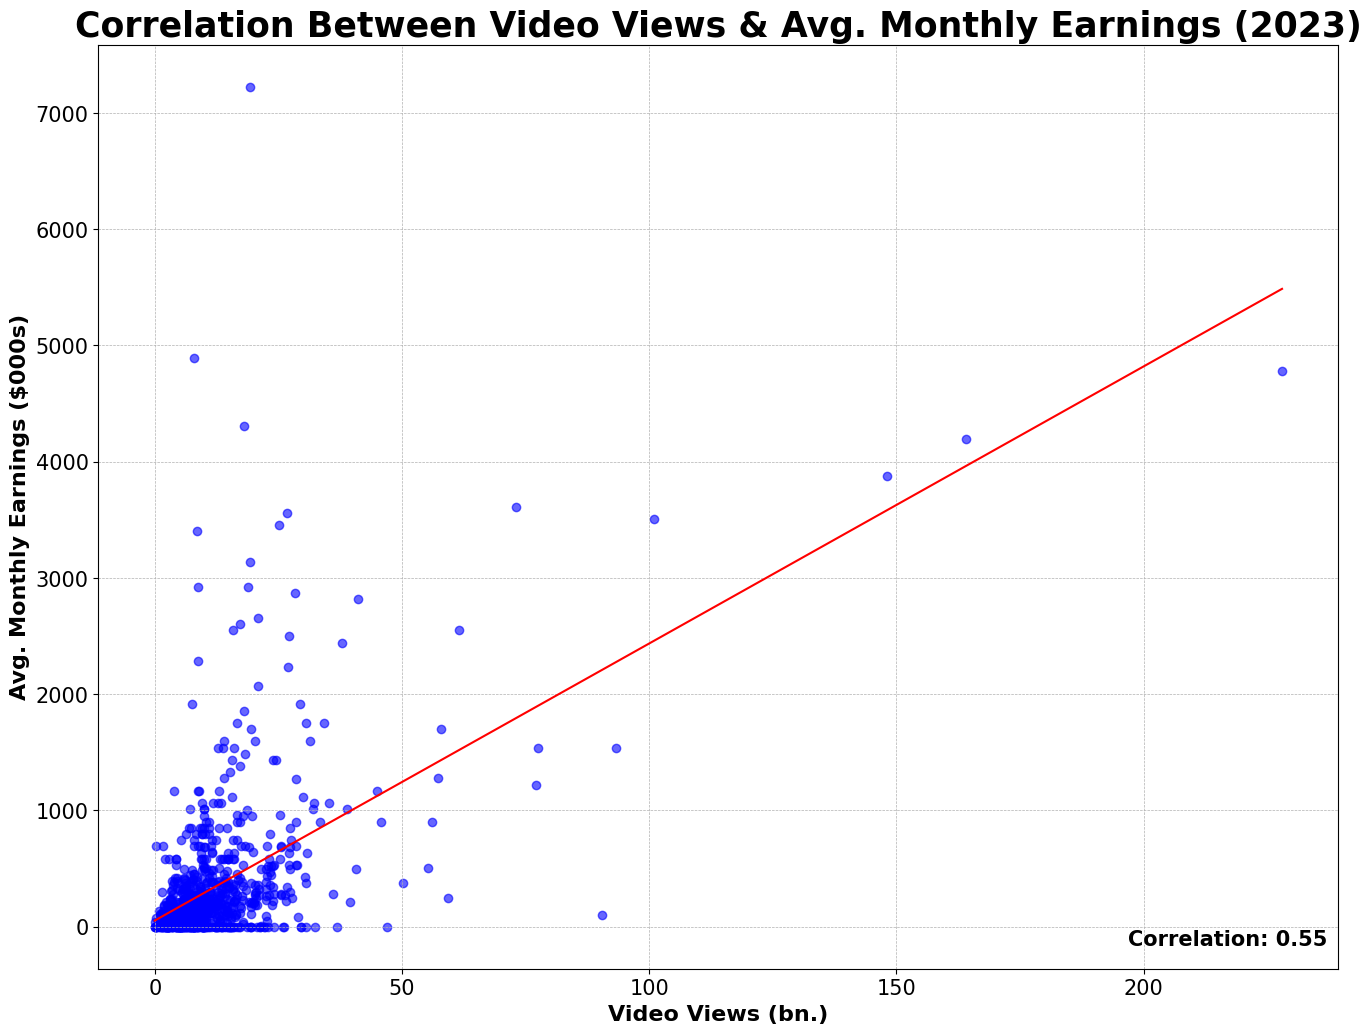

In [276]:
# Calculate the correlation coefficient
correlation = df_sub_pop_4['Video Views (bn.)'].corr(df_sub_pop_4['Avg. Monthly Earnings ($000s)'])

# Create linear regression for trend line
m, b = np.polyfit(df_sub_pop_4['Video Views (bn.)'], df_sub_pop_4['Avg. Monthly Earnings ($000s)'], 1)

# Sort data by 'Video Views (bn.)'
df_sub_pop_4 = df_sub_pop_4.sort_values(by='Video Views (bn.)')

# Set scaling factor of circle size
scaling_factor = 4

# Set figuresize
plt.figure(figsize = (16, 12))

# Calculate the size of circles
sizes = df_sub_pop_4['Video Views (bn.)'] * scaling_factor

# Plot df as a scatter
plt.scatter(df_sub_pop_4['Video Views (bn.)'], df_sub_pop_4['Avg. Monthly Earnings ($000s)'], color = '#0000FF', alpha = 0.6)

# Plot trendline
plt.plot(df_sub_pop_4['Video Views (bn.)'], m * df_sub_pop_4['Video Views (bn.)'] + b, color = '#FF0000')

# Adjust chart formatting
plt.title('Correlation Between Video Views & Avg. Monthly Earnings (2023)', fontsize = 25, weight = 'bold')

plt.xlabel('Video Views (bn.)', fontsize = 16, weight = 'bold')
plt.ylabel('Avg. Monthly Earnings ($000s)', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.annotate(f'Correlation: {correlation:.2f}',
             xy = (0.83, 0.025),
             xycoords = 'axes fraction',
             fontsize = 15,
             weight = 'bold')

plt.show()

In [277]:
cluster_data = data[['subscribers', 'video views']]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

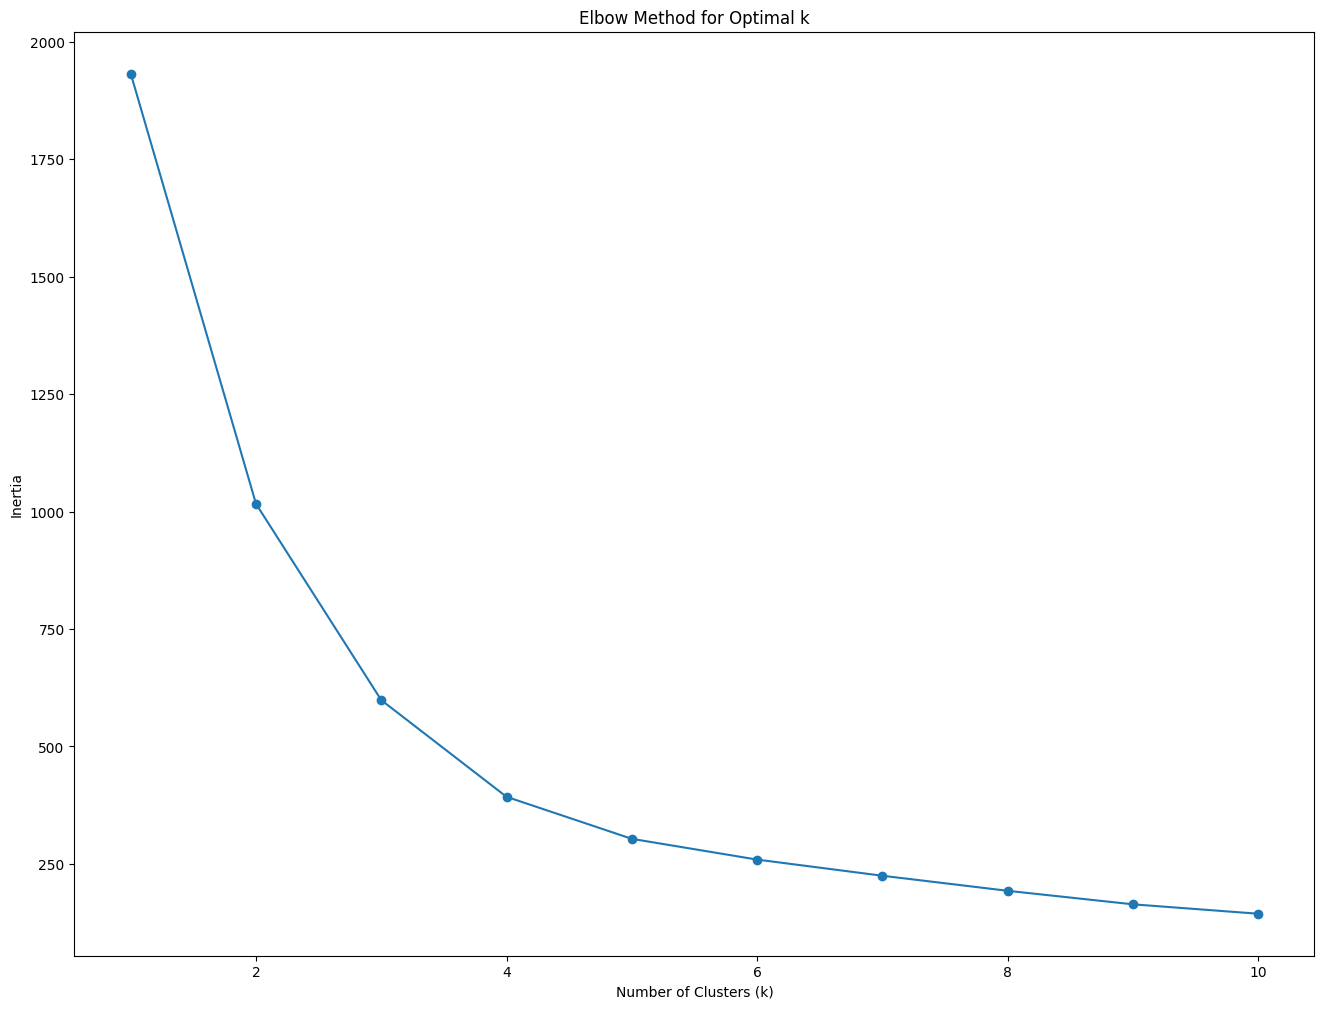

In [278]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [279]:
optimal_k = 6 #From Graph

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


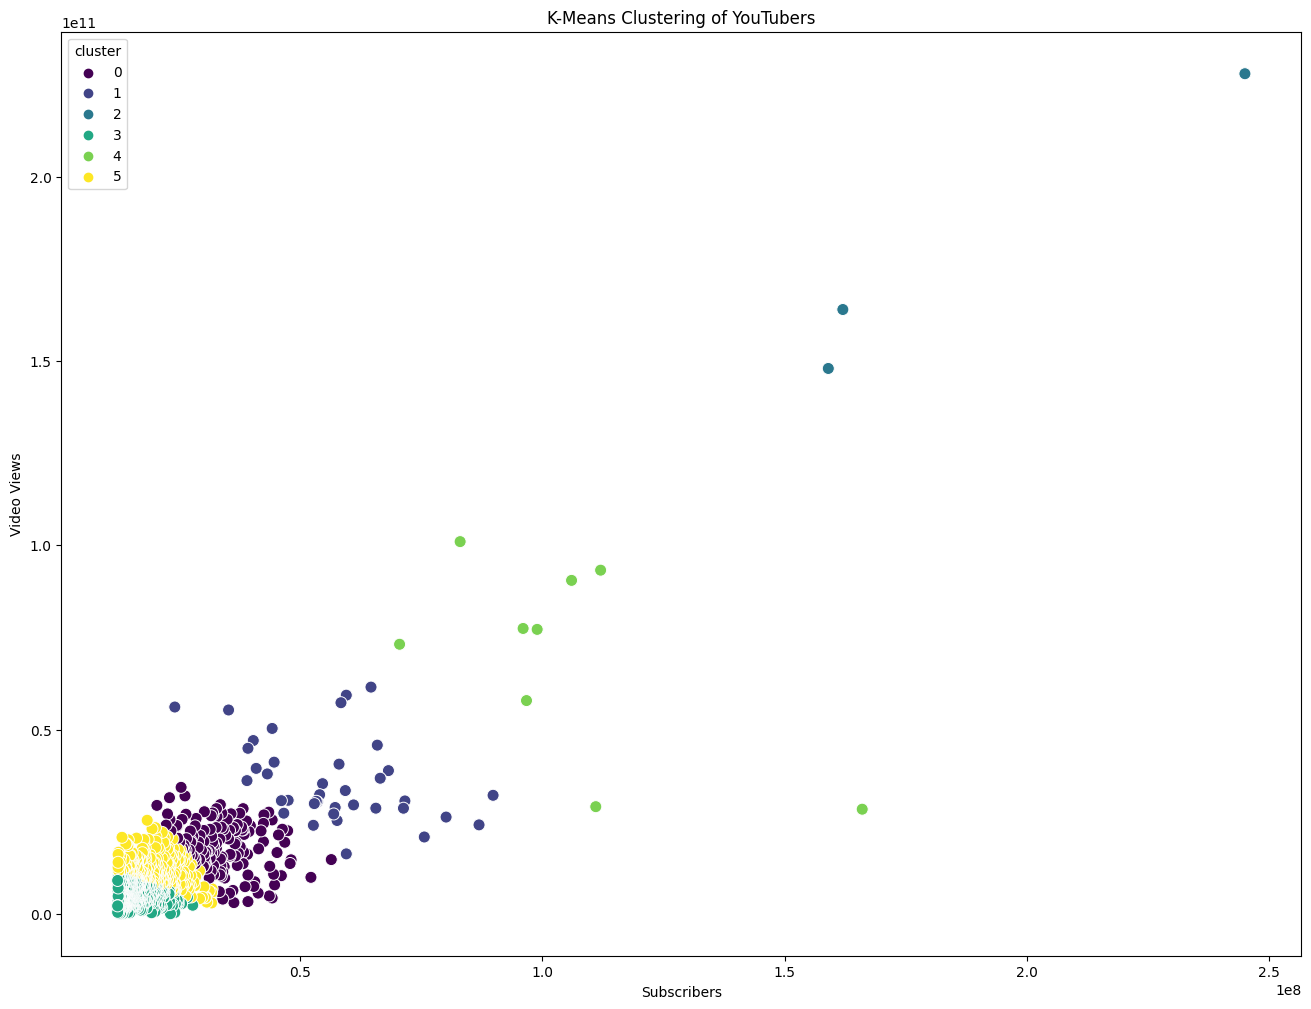

In [298]:
sns.scatterplot(x='subscribers', y='video views', hue='cluster', data=data, palette='viridis',s=75)
plt.title('K-Means Clustering of YouTubers')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.show()

In [281]:
cluster_summary = data.groupby('cluster')[['subscribers', 'video views']].mean()
print(cluster_summary)


          subscribers   video views
cluster                            
0        3.407222e+07  1.829203e+10
1        5.645789e+07  3.608249e+10
2        1.886667e+08  1.800000e+11
3        1.570101e+07  4.699925e+09
4        1.044556e+08  6.975077e+10
5        2.022058e+07  1.200431e+10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

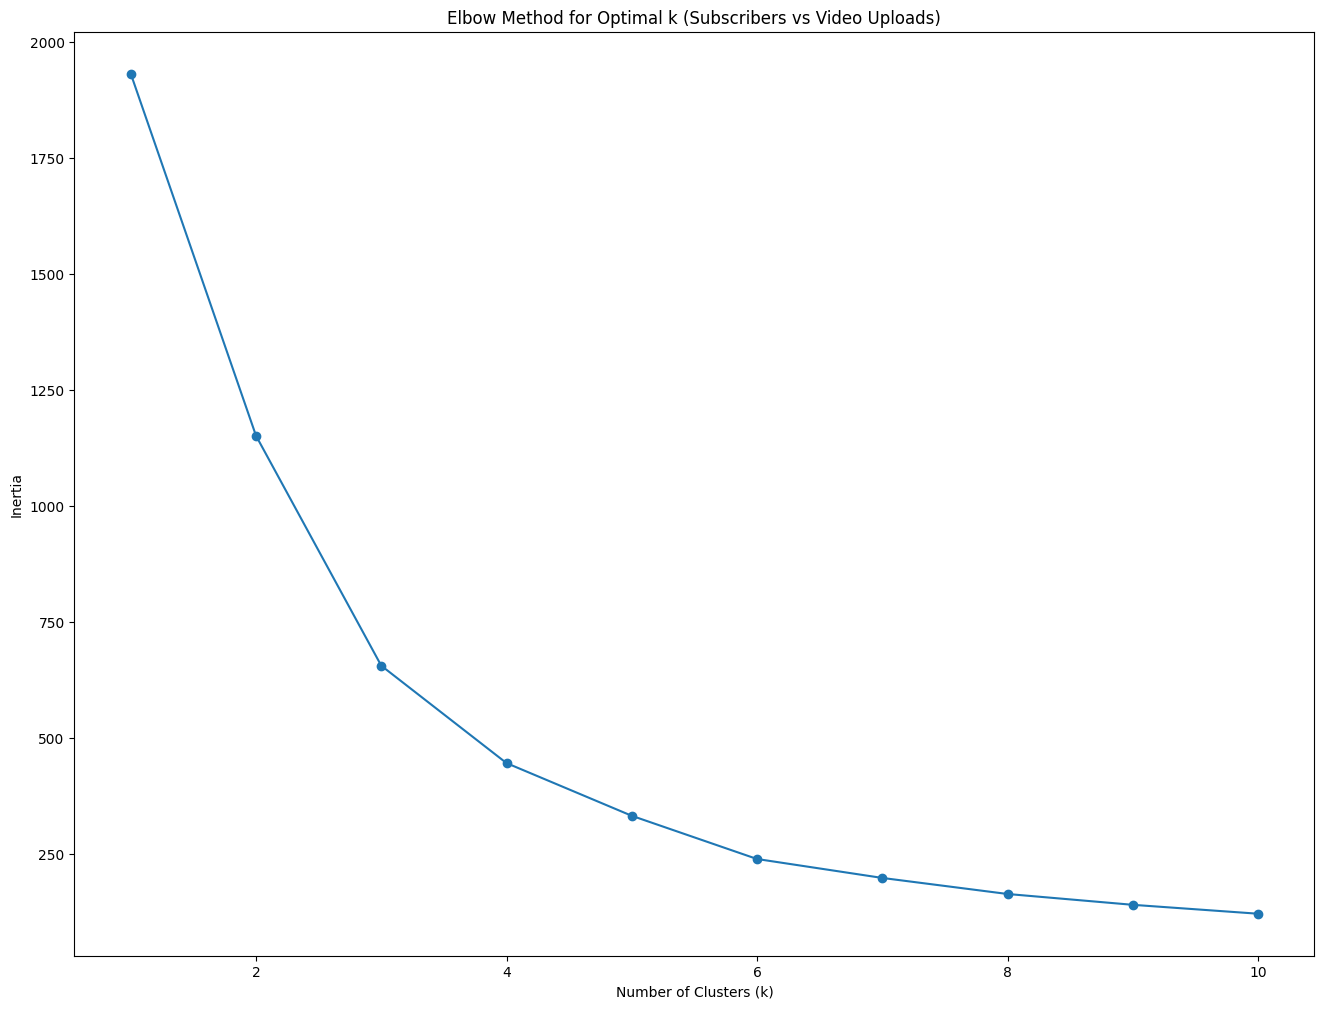

In [299]:
# Data for subscribers vs video uploads
cluster_data_1 = data[['subscribers', 'Uploads (k.)']]
scaled_data_1 = StandardScaler().fit_transform(cluster_data_1)

# Perform k-means clustering
inertia_1 = []
for i in range(1, 11):
    kmeans_1 = KMeans(n_clusters=i, random_state=42)
    kmeans_1.fit(scaled_data_1)
    inertia_1.append(kmeans_1.inertia_)

# Plot the Elbow Method for optimal k
plt.plot(range(1, 11), inertia_1, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Subscribers vs Video Uploads)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


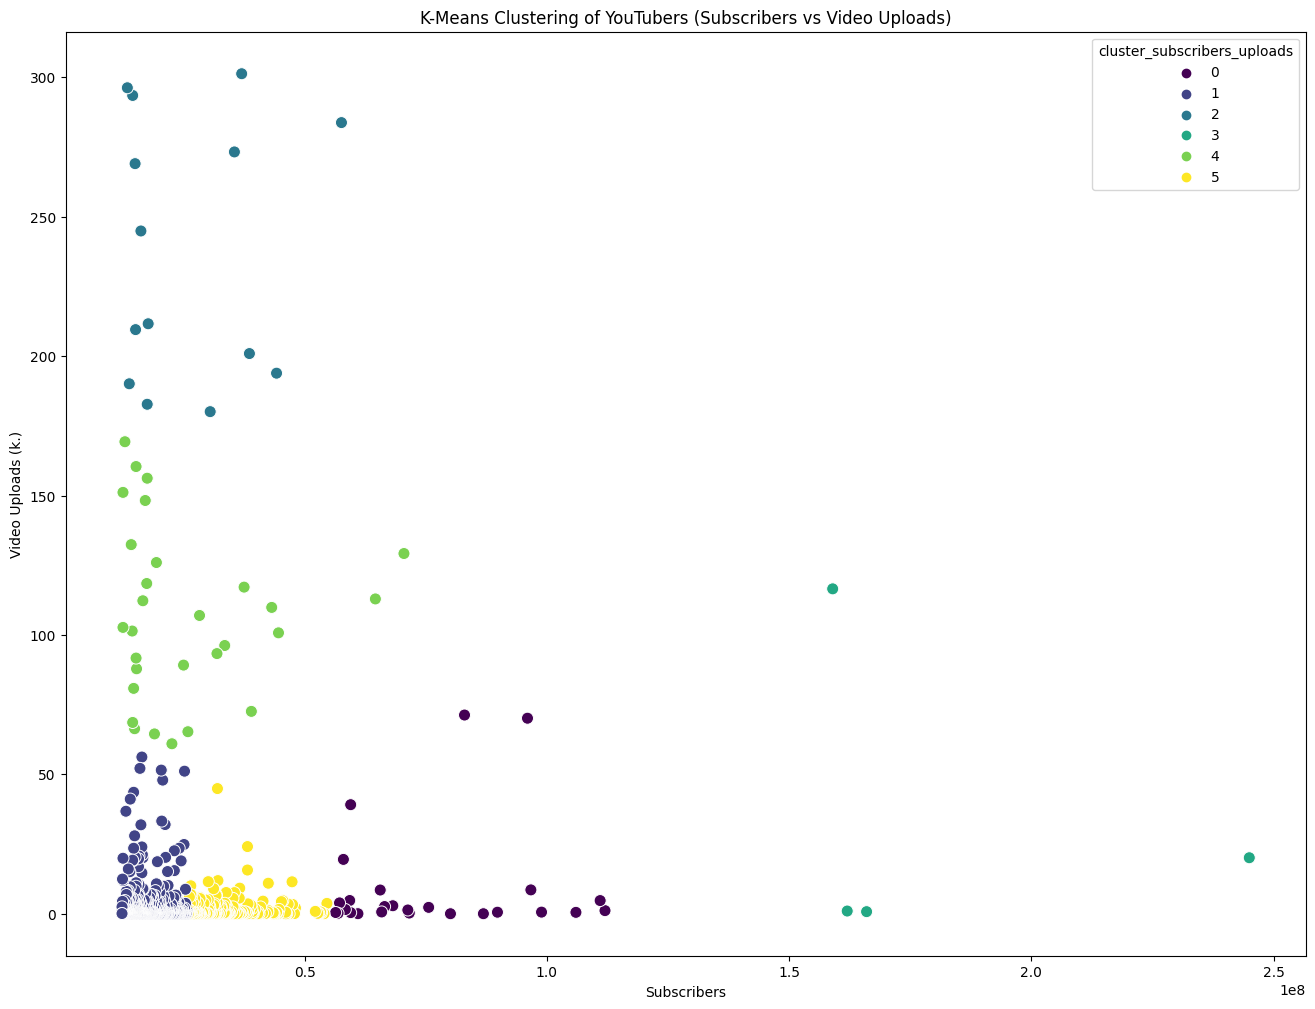

In [300]:
# Set optimal_k based on the Elbow Method
optimal_k_1 = 6

# Perform k-means clustering with optimal k
kmeans_1 = KMeans(n_clusters=optimal_k_1, random_state=42)
data['cluster_subscribers_uploads'] = kmeans_1.fit_predict(scaled_data_1)

# Scatter plot for subscribers vs video uploads with clustering
sns.scatterplot(x='subscribers', y='Uploads (k.)', hue='cluster_subscribers_uploads', data=data, palette='viridis', s=75)
plt.title('K-Means Clustering of YouTubers (Subscribers vs Video Uploads)')
plt.xlabel('Subscribers')
plt.ylabel('Video Uploads (k.)')
plt.show()

In [306]:
cluster_summary = data.groupby('cluster')[['subscribers', 'Uploads (k.)']].mean()
print(cluster_summary)

          subscribers  Uploads (k.)
cluster                            
0        3.407222e+07     12.354063
1        5.645789e+07     26.394316
2        1.886667e+08     45.861333
3        1.570101e+07      5.104966
4        1.044556e+08     31.864889
5        2.022058e+07     12.256560


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

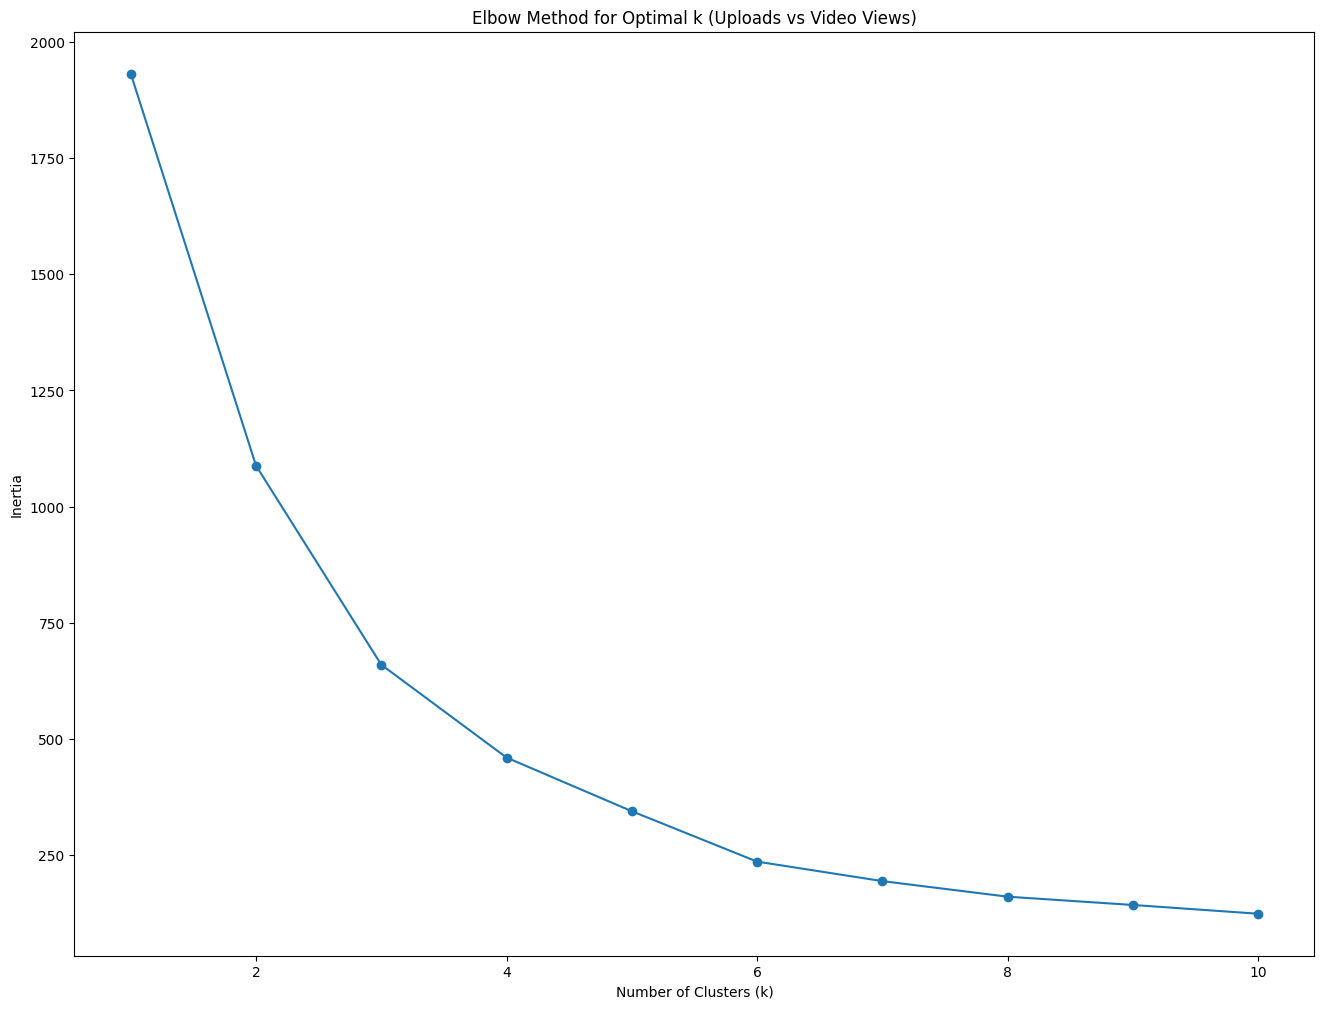

In [302]:
# Data for number of uploads vs video views
cluster_data_2 = data[['Uploads (k.)', 'Video Views (bn.)']]
scaled_data_2 = StandardScaler().fit_transform(cluster_data_2)

# Perform k-means clustering
inertia_2 = []
for i in range(1, 11):
    kmeans_2 = KMeans(n_clusters=i, random_state=42)
    kmeans_2.fit(scaled_data_2)
    inertia_2.append(kmeans_2.inertia_)

# Plot the Elbow Method for optimal k
plt.plot(range(1, 11), inertia_2, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Uploads vs Video Views)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


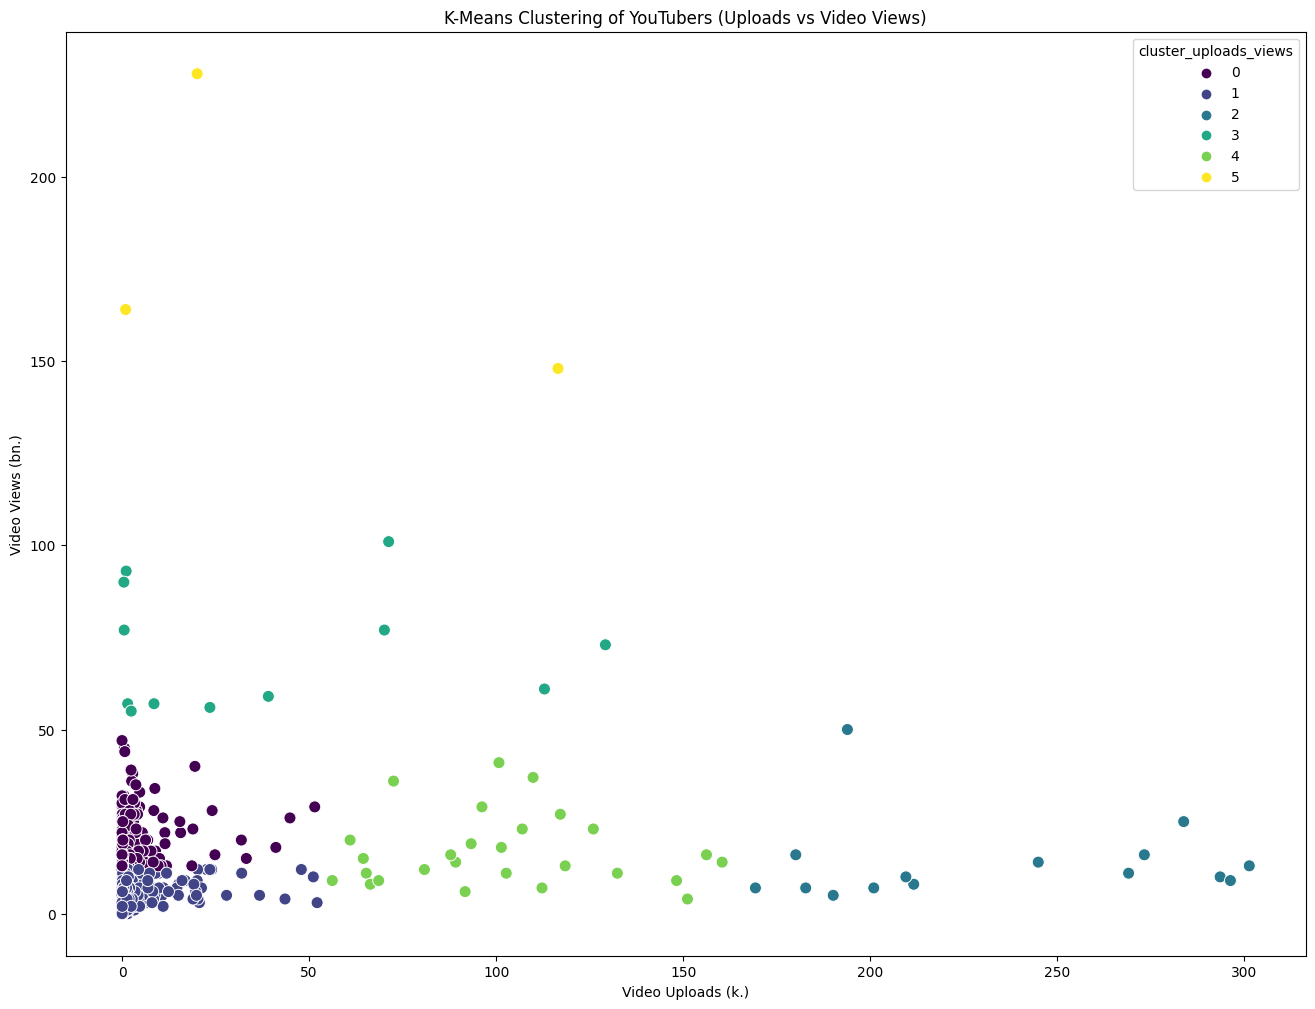

In [303]:
# Set optimal_k based on the Elbow Method
optimal_k_2 = 6

# Perform k-means clustering with optimal k
kmeans_2 = KMeans(n_clusters=optimal_k_2, random_state=42)
data['cluster_uploads_views'] = kmeans_2.fit_predict(scaled_data_2)

# Scatter plot for number of uploads vs video views with clustering
sns.scatterplot(x='Uploads (k.)', y='Video Views (bn.)', hue='cluster_uploads_views', data=data, palette='viridis', s=75)
plt.title('K-Means Clustering of YouTubers (Uploads vs Video Views)')
plt.xlabel('Video Uploads (k.)')
plt.ylabel('Video Views (bn.)')
plt.show()

In [307]:
cluster_summary = data.groupby('cluster')[['Video Views (bn.)', 'Uploads (k.)']].mean()
print(cluster_summary)

         Video Views (bn.)  Uploads (k.)
cluster                                 
0                17.791667     12.354063
1                35.631579     26.394316
2               180.000000     45.861333
3                 4.210101      5.104966
4                69.444444     31.864889
5                11.487365     12.256560


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

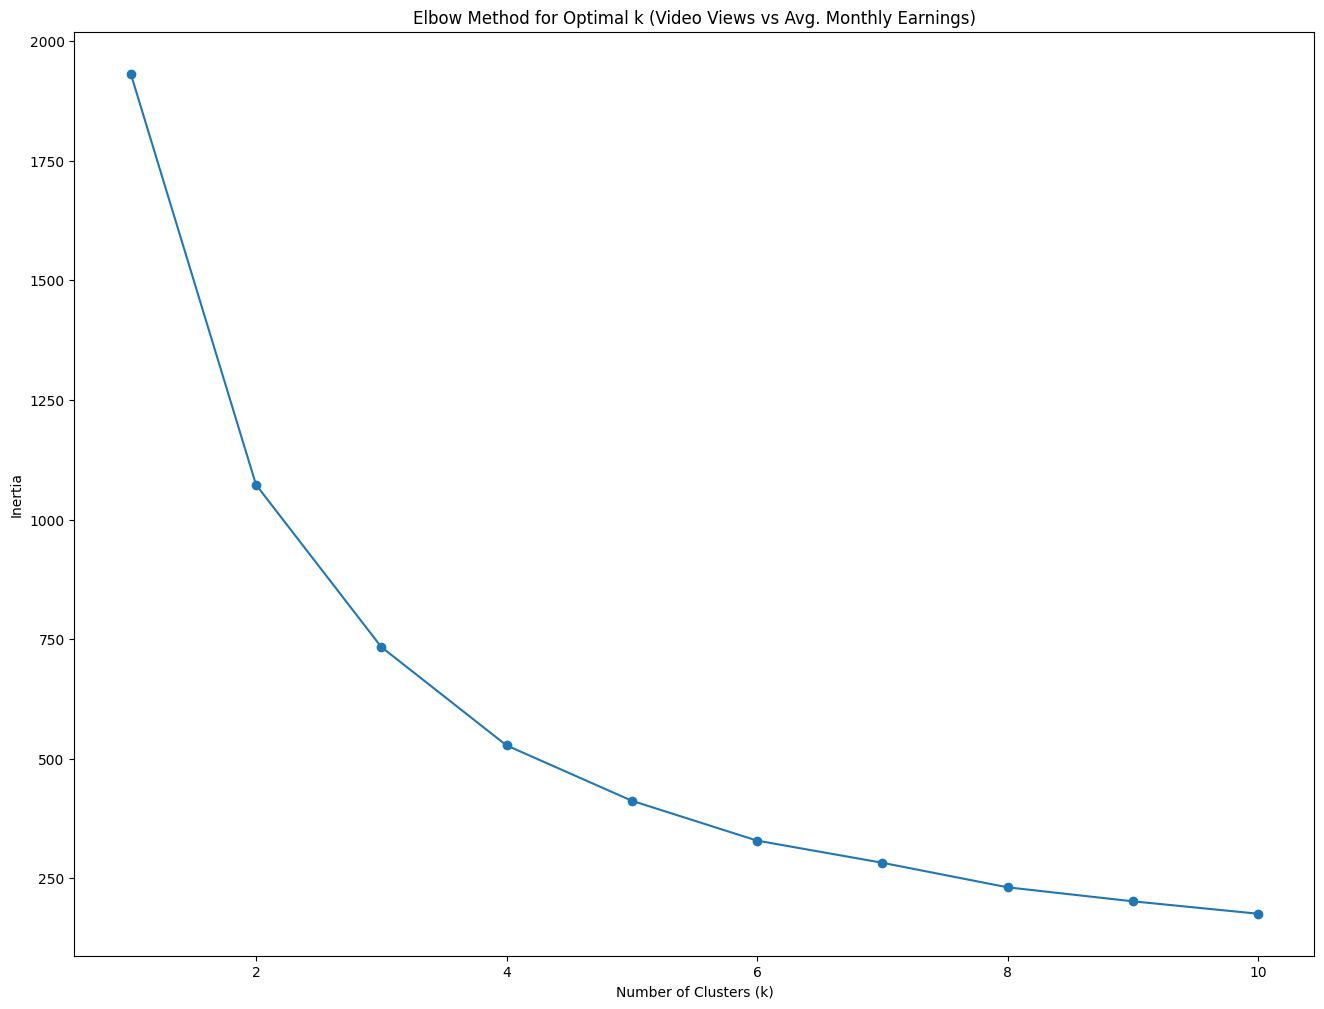

In [304]:
# Data for video views vs avg monthly earnings
cluster_data_3 = data[['video views', 'Avg. Monthly Earnings']]
scaled_data_3 = StandardScaler().fit_transform(cluster_data_3)

# Perform k-means clustering
inertia_3 = []
for i in range(1, 11):
    kmeans_3 = KMeans(n_clusters=i, random_state=42)
    kmeans_3.fit(scaled_data_3)
    inertia_3.append(kmeans_3.inertia_)

# Plot the Elbow Method for optimal k
plt.plot(range(1, 11), inertia_3, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Video Views vs Avg. Monthly Earnings)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


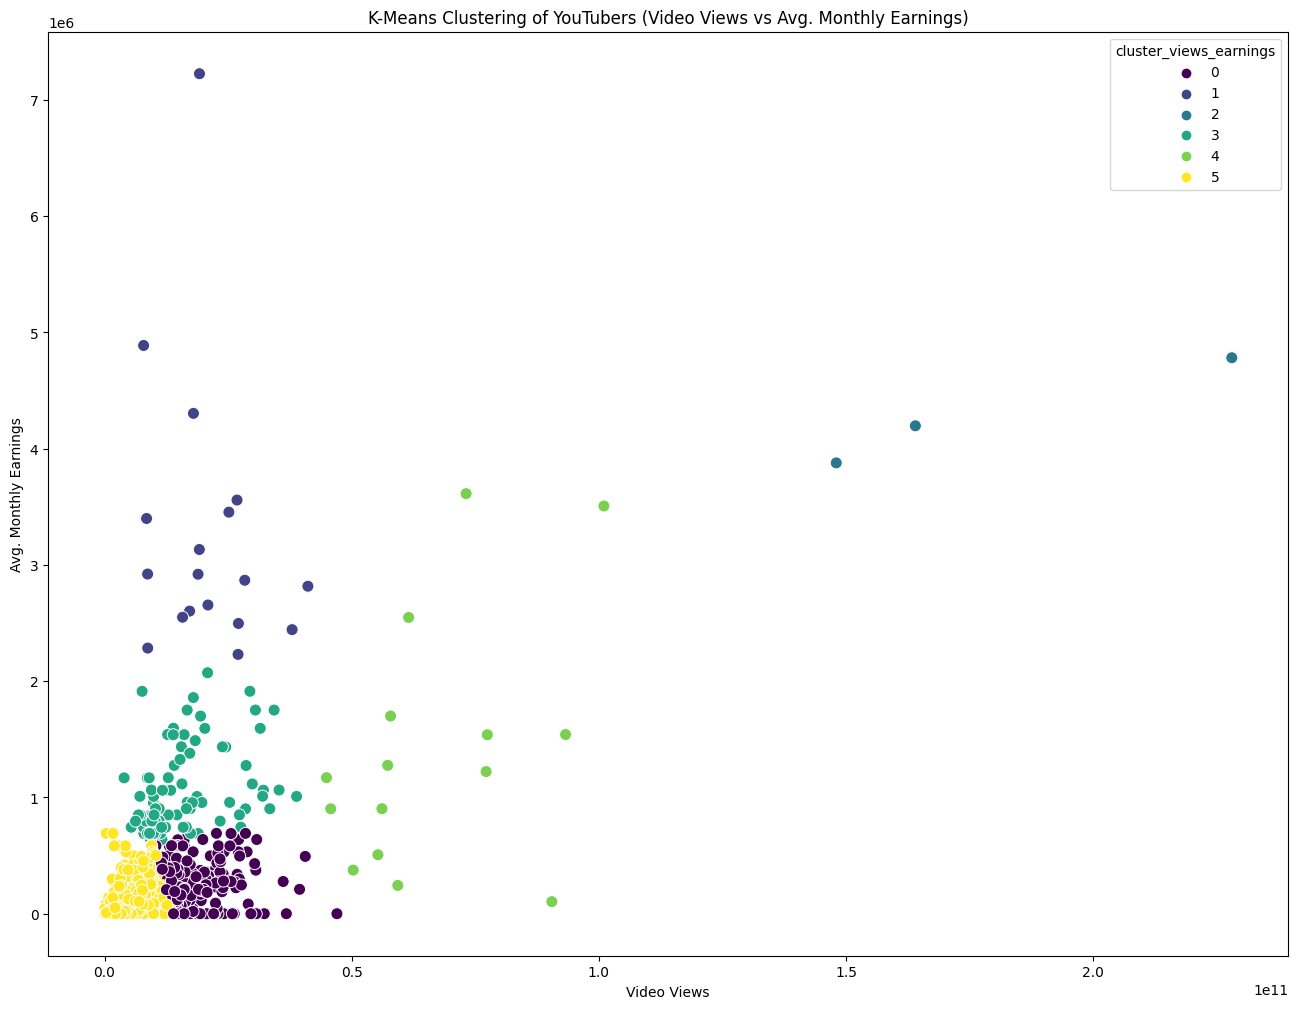

In [305]:
# Set optimal_k based on the Elbow Method
optimal_k_3 = 6
# Perform k-means clustering with optimal k
kmeans_3 = KMeans(n_clusters=optimal_k_3, random_state=42)
data['cluster_views_earnings'] = kmeans_3.fit_predict(scaled_data_3)

# Scatter plot for video views vs avg monthly earnings with clustering
sns.scatterplot(x='video views', y='Avg. Monthly Earnings', hue='cluster_views_earnings', data=data, palette='viridis', s=75)
plt.title('K-Means Clustering of YouTubers (Video Views vs Avg. Monthly Earnings)')
plt.xlabel('Video Views')
plt.ylabel('Avg. Monthly Earnings')
plt.show()

In [308]:
cluster_summary = data.groupby('cluster')[['Video Views (bn.)', 'Avg. Monthly Earnings']].mean()
print(cluster_summary)

         Video Views (bn.)  Avg. Monthly Earnings
cluster                                          
0                17.791667           4.669559e+05
1                35.631579           7.377540e+05
2               180.000000           4.285717e+06
3                 4.210101           1.286166e+05
4                69.444444           1.797789e+06
5                11.487365           4.381366e+05


In [282]:
# selected_columns = ['video views', 'highest_monthly_earnings']
# data2 = data[selected_columns].dropna()

# bin_size = 12000000000
# data['views_bin'] = pd.cut(data['video views'], bins=np.arange(0, data['video views'].max() + bin_size, bin_size))

# # Group by views bins and calculate the average highest monthly earnings
# grouped_data = data.groupby('views_bin')['highest_monthly_earnings'].mean().reset_index()


In [283]:
# # Plot the binned data
# plt.bar(grouped_data['views_bin'].astype(str), grouped_data['highest_monthly_earnings'], color='skyblue')
# plt.xlabel('Video Views (Bins of 60k)')
# plt.ylabel('Average Highest Monthly Earnings')
# plt.title('Average Highest Monthly Earnings vs. Video Views')
# plt.xticks(rotation=45, ha='right')
# plt.show()


In [284]:
# # Create a linear regression model
# model = LinearRegression()

# # Fit the model to the training data
# model.fit(X_train, y_train)


In [285]:
# # Make predictions on the testing set
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'Root Mean Squared Error: {rmse}')
# print(f'R-squared: {r2}')

In [286]:
# # Plot the original data points
# plt.scatter(X_test, y_test, color='black', label='Actual Data')

# # Plot the regression line
# plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')

# plt.title('Linear Regression: Views vs. Average Income')
# plt.xlabel('Video Views')
# plt.ylabel('Average Income')
# plt.legend()
# plt.show()

In [287]:
data_encoded_onehot = pd.get_dummies(data, columns=categorical_columns)

In [288]:
data_encoded_label = data.copy()  # Create a copy to avoid modifying the original dataset

label_encoder = LabelEncoder()
for column in categorical_columns:
    data_encoded_label[column] = label_encoder.fit_transform(data[column])

In [289]:
# data_combined_onehot = pd.concat([data, data_encoded_onehot], axis=1)
# data_combined_label = pd.concat([data, data_encoded_label], axis=1)

In [290]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded_label)

In [291]:
k = 3  # Adjust based on your analysis
kmeans = KMeans(n_clusters=k, random_state=42)
data_encoded_label['cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [292]:
cluster_summary = data_encoded_label.groupby('cluster').mean()

In [293]:
cluster_summary

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Subscribers (mn.),Video Views (bn.),Uploads (k.),Avg. Monthly Earnings
cluster,,,,,,,,,,,,,,,,,,,,,
0,509.511811,472.267717,2.082572e+07,1.019479e+10,6.669291,456.002625,4189.616798,45.721785,41.104987,6.262467,...,84.211286,2.655288e+08,12.897323,2.185589e+08,40.315414,-69.186068,20.375328,9.703412,4.189617,2.057705e+05
1,217.653846,497.865385,5.108269e+07,3.941433e+10,6.480769,479.326923,28850.076923,30.326923,30.326923,5.250000,...,56.719231,5.118188e+08,8.200192,2.381850e+08,26.933882,12.813029,50.692308,38.923077,28.850077,2.374475e+06
2,518.039400,485.050657,2.127598e+07,9.176060e+09,6.281426,496.191370,11316.911820,21.215760,23.230769,6.816135,...,35.234146,4.577962e+08,4.813114,1.820423e+08,10.492480,24.408997,20.855535,8.679174,11.316912,2.016348e+05


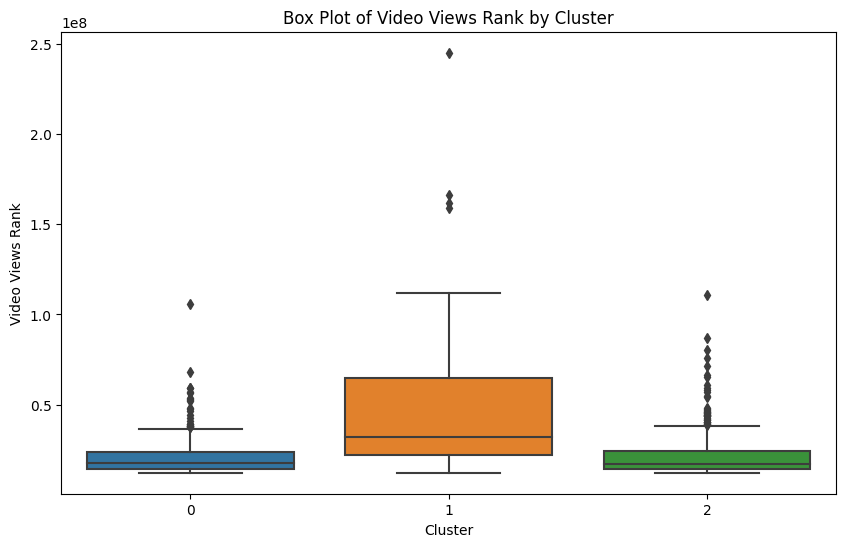

In [294]:
# Box plot of 'video_views_rank' by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='subscribers', data=data_encoded_label)
plt.title('Box Plot of Video Views Rank by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Video Views Rank')
plt.show()